In [4]:
import argparse
import os
import sys
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision.datasets import Places365, CIFAR100
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor
import clip
from datasets import load_dataset
import json
from tqdm import tqdm



device = "cuda" if torch.cuda.is_available() else "cpu"

auth_token = "your_token_hereeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee"  # Replace with an auth token, which you can get from your huggingface account: Profile -> Settings -> Access Tokens -> New Token
winoground = load_dataset("facebook/winoground", use_auth_token=auth_token)["test"]

model, preprocess = clip.load("ViT-B/32", jit=False)
model.to(device).eval()

transform_image = Compose(
    [
        Resize(model.visual.input_resolution, interpolation=Image.BICUBIC),
        CenterCrop(model.visual.input_resolution),
        lambda image: image.convert("RGB"),
    ]
)


def attention_heatmap(idx, variant_idx):
    image = winoground[idx][f"image_{variant_idx}"].convert("RGB")
    image_input = preprocess(image).unsqueeze(0)

    with torch.no_grad():
        image_attention = model.encode_image_attention(image_input.to(device)).cpu().numpy()

    fig = plt.figure(figsize=[10, 5], frameon=False)
    ax = fig.add_subplot(1, 2, 1)
    ax.axis("off")
    ax.imshow(transform_image(image))
    ax = fig.add_subplot(1, 2, 2)
    ax.axis("off")
    ax.imshow(image_attention[0].reshape(7, 7))
    fig.subplots_adjust(hspace=0, wspace=0)
    fig.savefig(f"/mnt/c/Users/Sean/Downloads/clip_vit_attention/{idx}_{variant_idx}")
    plt.close(fig)



Using the latest cached version of the module from /home/sean/.cache/huggingface/modules/datasets_modules/datasets/facebook--winoground/72585f4d9cd5a28790bb9bc2adbdd45633f36dfbf85df529e0756e114e134285 (last modified on Fri Oct  6 21:10:26 2023) since it couldn't be found locally at facebook/winoground., or remotely on the Hugging Face Hub.


Found cached dataset winoground (/home/sean/.cache/huggingface/datasets/facebook___winoground/default/0.0.0/72585f4d9cd5a28790bb9bc2adbdd45633f36dfbf85df529e0756e114e134285)


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
for i in tqdm(range(len(winoground))):
    for j in range(2):
        attention_heatmap(i, j)

100%|██████████| 400/400 [03:15<00:00,  2.04it/s]


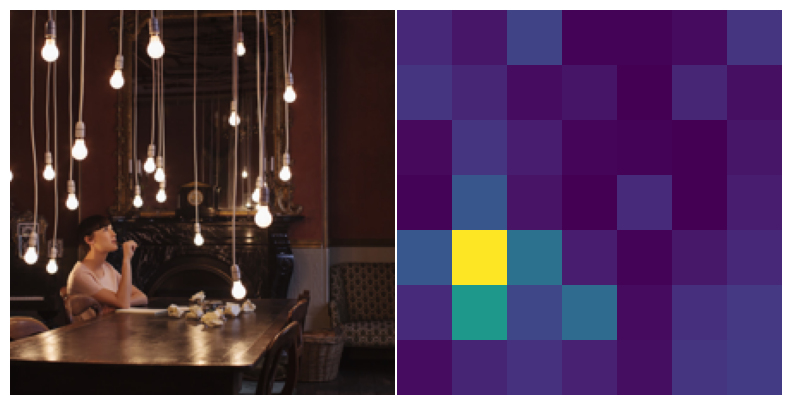

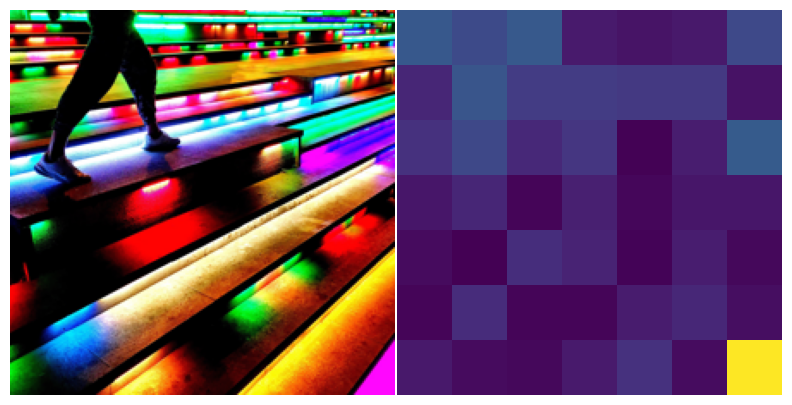

In [2]:
attention_heatmap(162, 0)
attention_heatmap(162, 1)